# Inspect direct beam histogram with QuantiCam
- [X] Redirect laser elongated profile directly into the sensor to observe sharp peak without internal reflection from the obscure box
- [X] HDF5 data acquisition stream
- [ ] Peak detection algorithm employed
- [ ] Model Poission noise for the direct path

| Layout | Illumination |
|:--------:|:--------|
| ![alt text](./img/PXL_20250317_Direct_Laser_Hist_Layout.jpg "Beam path") | ![alt text](./img/PXL_20250317_Direct_Laser_Hist_DarkIllumination.jpg "Beam path") |  

In [1]:
using QuantiCam

## Setup connection to the QC FPGA
- Write FW
- Config voltages
- Config sensor settings for the mode we use

In [11]:
if (@isdefined qc) && qc!== nothing
    # Try to reconfigure or cleanup and initialise from the begining
    try
        QuantiCam.reload_config(qc, "../config/tcspc.json")
        QuantiCam.config_sensor(qc)
    catch
        #QuantiCam.sensor_disconnect(qc)
        QuantiCam.cleanup(qc)
    end
end
if !(@isdefined qc) || qc === nothing
    qc = QCBoard("../hw/TOP_7310_modes_1_2.bit", "../config/tcspc.json")
    init_board!(qc)
end

[ Info: Reset sensor and set parameters for the MODE of use
[ Info: Sensor configured


In [30]:
#QuantiCam.sensor_disconnect(qc)
QuantiCam.cleanup(qc)

[ Info: Disconnected from Sensor
[ Info: Cleaning up FPGA connection to OK FrontPanel
[ Info: FPGA desctructed! => Safe exit


In [17]:
frames = QuantiCam.capture_frames(qc, 5000);


In [9]:
size(frames[1])

(192, 128)

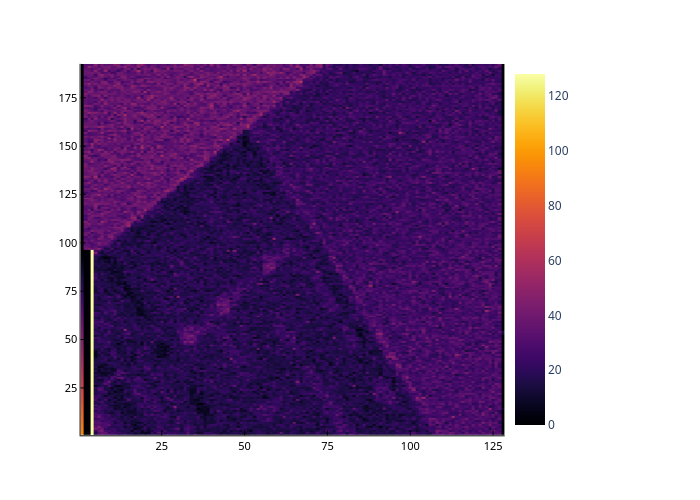

In [13]:
using Plots
plotlyjs()
heatmap(frames[2])

In [29]:
for _ in 1:100
    frame = QuantiCam.capture_frame(qc)
    heatmap(frame)
    sleep(0.1)
end

┌ Error: Row ID mismatch when parsing: Expecting(1), Got(6); Header: QuantiCam.RowPairHeader(0x00, 0x00, 0x05)
└ @ QuantiCam ~/Documents/Scripts/Julia/opal-kelly/QuantiCam/src/utils.jl:50


LoadError: Row ID mismatch when parsing: Expecting(1), Got(5); Header: QuantiCam.RowPairHeader(0x00, 0x00, 0x05)

## TCSPC Histogram
- [ ] Aquire N tcspc frames
- [ ] Make histogram for each pixel

In [4]:
#hdf5_filename = "./450nm_direct_illumination_raw_line-21032025-17-00.h5"
laser_power = 0.70
laser_wavelength="640nm"
date = "25032025"
#hdf5_filename = "./$(laser_wavelength)_direct_illumination_raw_line.h5"
hdf5_filename = "./irf_experiment/$(laser_wavelength)_direct_illumination_raw_line-$(date)-18-51.h5"

"./irf_experiment/640nm_direct_illumination_raw_line-25032025-18-51.h5"

In [ ]:
using Serde
number_of_frames = 5000
hdf5_task, hdf5_channel = QuantiCam.hdf5_collector_init(hdf5_filename, Matrix{UInt16}; description="Direct illumination with the laser reflec from a mirror directly into the objective at low power with an ND OD=0.5 filter. This should allow to see a clear peak, with less influence from multiple reflections inside the obsucre enclosure.")

LoadError: AssertionError: HDF5 file ./450nm_direct_illumination_raw_line-21032025-17-00.h5 already exists

In [80]:
# Create dataset group
group_config = QuantiCam.GroupConfig("Background", number_of_frames, "Measurement without the laser turned on")
put!(hdf5_channel, group_config)

frames = QuantiCam.capture_frames(qc, number_of_frames; hdf_channel=hdf5_channel);

[ Info: Creating dataset for frames of type: UInt16 and size: (5000, 192, 128) in group: HDF5.Group: /Background (file: ./450nm_direct_illumination_raw_line-21032025-17-00.h5)


In [31]:
put!(hdf5_channel, QuantiCam.Clear("Background"))

QuantiCam.Clear("Background")

In [81]:
# Create dataset group
group_config = QuantiCam.GroupConfig("$(laser_power*100)% power; 0ps delay", number_of_frames, "Measurement with the laser for 640nm wavelength")
put!(hdf5_channel, group_config)
put!(hdf5_channel, Dict("laser_delay"=>"0 ps", "laser_wavelength"=>laser_wavelength, "laser_power"=>laser_power))

frames = QuantiCam.capture_frames(qc, number_of_frames; hdf_channel=hdf5_channel);

[ Info: Creating dataset for frames of type: UInt16 and size: (5000, 192, 128) in group: HDF5.Group: /70.0% power; 0ps delay (file: ./450nm_direct_illumination_raw_line-21032025-17-00.h5)


In [83]:
put!(hdf5_channel, QuantiCam.Clear("$(laser_power*100)% power; 500ps delay"))

QuantiCam.Clear("70.0% power; 500ps delay")

In [84]:
# Create dataset group
group_config = QuantiCam.GroupConfig("$(laser_power*100)% power; 500ps delay", number_of_frames, "Measurement with the laser for 640nm wavelength")
put!(hdf5_channel, group_config)
put!(hdf5_channel, Dict("laser_delay"=>"500 ps", "laser_wavelength"=>laser_wavelength, "laser_power"=>laser_power))

frames = QuantiCam.capture_frames(qc, number_of_frames; hdf_channel=hdf5_channel);

[ Info: Creating dataset for frames of type: UInt16 and size: (5000, 192, 128) in group: HDF5.Group: /70.0% power; 500ps delay (file: ./450nm_direct_illumination_raw_line-21032025-17-00.h5)


In [85]:
# Create dataset group
group_config = QuantiCam.GroupConfig("$(laser_power*100)% power; 1000ps delay", number_of_frames, "Measurement with the laser for 640nm wavelength")
put!(hdf5_channel, group_config)
put!(hdf5_channel, Dict("laser_delay"=>"1000 ps", "laser_wavelength"=>laser_wavelength, "laser_power"=>laser_power))

frames = QuantiCam.capture_frames(qc, number_of_frames; hdf_channel=hdf5_channel);

[ Info: Creating dataset for frames of type: UInt16 and size: (5000, 192, 128) in group: HDF5.Group: /70.0% power; 1000ps delay (file: ./450nm_direct_illumination_raw_line-21032025-17-00.h5)


In [86]:
# Create dataset group
group_config = QuantiCam.GroupConfig("$(laser_power*100)% power; 1500ps delay", number_of_frames, "Measurement with the laser for 640nm wavelength")
put!(hdf5_channel, group_config)
put!(hdf5_channel, Dict("laser_delay"=>"1500 ps", "laser_wavelength"=>laser_wavelength, "laser_power"=>laser_power))

frames = QuantiCam.capture_frames(qc, number_of_frames; hdf_channel=hdf5_channel);

[ Info: Creating dataset for frames of type: UInt16 and size: (5000, 192, 128) in group: HDF5.Group: /70.0% power; 1500ps delay (file: ./450nm_direct_illumination_raw_line-21032025-17-00.h5)


In [87]:
put!(hdf5_channel, QuantiCam.Terminate())
wait(hdf5_task)

# Interpret

- Read frames from HDF5

In [32]:
using QuantiCam
using HDF5

fid = h5open(hdf5_filename, "r")
group = fid["$(laser_power*100)% power; 0ps delay"]
#group = fid["60% power; 0ps delay"]
frames_h5 = read_dataset(group, "frames")
# Reshape Array{T, 3} -> Vector{Matrix{T}}
frames = collect(Matrix{UInt16}, eachslice(frames_h5, dims=1));

In [33]:
filtered_frames = map(frame -> QuantiCam.filter_code(frame), frames)
typeof(filtered_frames)

Vector{Matrix{Union{Missing, Float32}}} (alias for Array{Array{Union{Missing, Float32}, 2}, 1})

In [34]:
using Statistics

function collect_frames(v::Vector{Matrix{T}}) where T
    n_rows = size(v[1], 1)
    n_cols = size(v[1], 2)
    n_matrices = length(v)
    
    result = Matrix{Vector{T}}(undef, n_rows, n_cols)
    
    for i in 1:n_rows, j in 1:n_cols
        result[i, j] = [v[k][i, j] for k in 1:n_matrices]
    end
    
    return result
end

#tcspc_stream = collect_frames([frames[:,:,i] for i in 1:size(frames,3)])
tcspc_stream_missing = collect_frames(filtered_frames)
tcspc_stream = map(pixel -> collect(skipmissing(pixel)), tcspc_stream_missing)
tcspc_mean = map(pixel -> mean(pixel), tcspc_stream)
tcspc_var = map(pixel -> var(pixel), tcspc_stream);

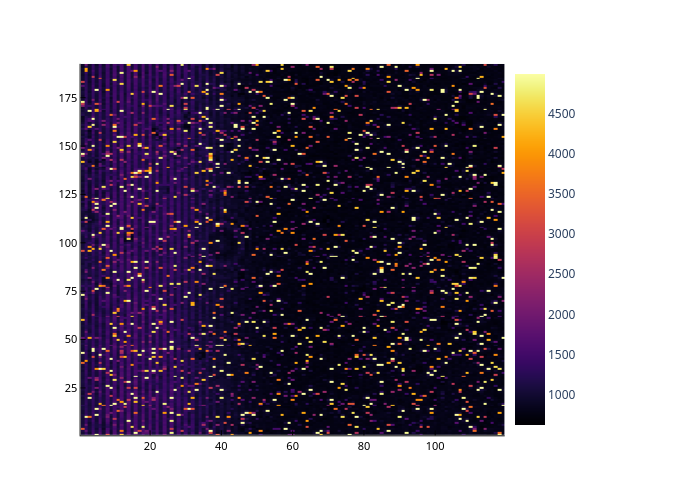

In [35]:
using Plots
plotlyjs()
frames_center = map(frame -> frame[1:192, 5:123], filtered_frames)
tcspc_events = map(pixel -> length(collect((skipmissing(pixel)))), tcspc_stream)
#heatmap(map(pixel -> length(collect((skipmissing(pixel)))), tcspc_stream))
#heatmap(map(pixel -> sum(collect((skipmissing(pixel)))), collect_frames(frames_center)))
heatmap(tcspc_events[:,5:123])
#heatmap(filtered_frames[24])

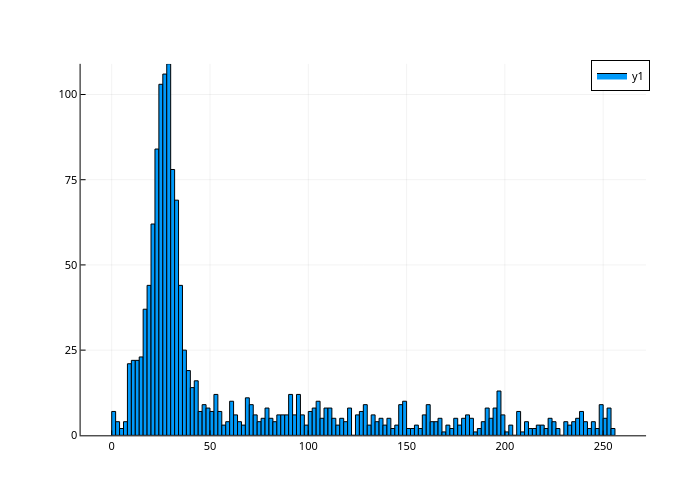

In [36]:
histogram(tcspc_stream[100, 20], bins=200)

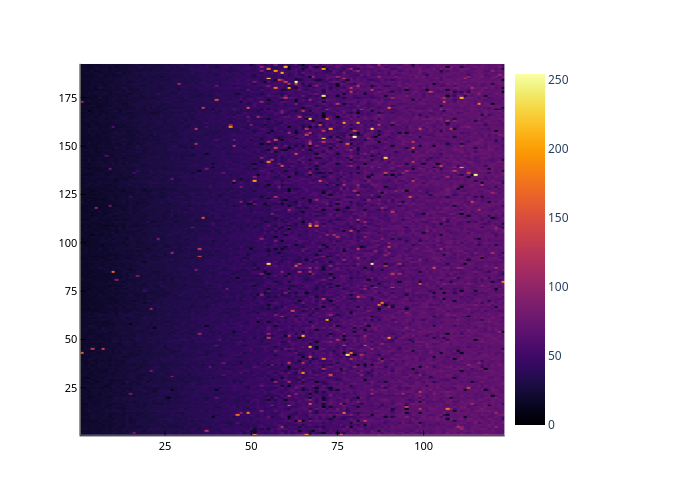

In [37]:
using StatsBase
function get_maximum(pixel::Vector{T}) where T
    pixel_stream = collect(skipmissing(pixel))
    h = fit(Histogram, pixel_stream, 0.0:1.0:255.0)
    idx = findfirst(==(maximum(h.weights)), h.weights)
    return h.edges[1][idx]
end
peaks = map(pixel -> get_maximum(pixel), tcspc_stream)
heatmap(peaks[:, 5:127])
# TODO: More useful would be in this case to plot uncertainty
#get_maximum(tcspc_stream[110, 20])

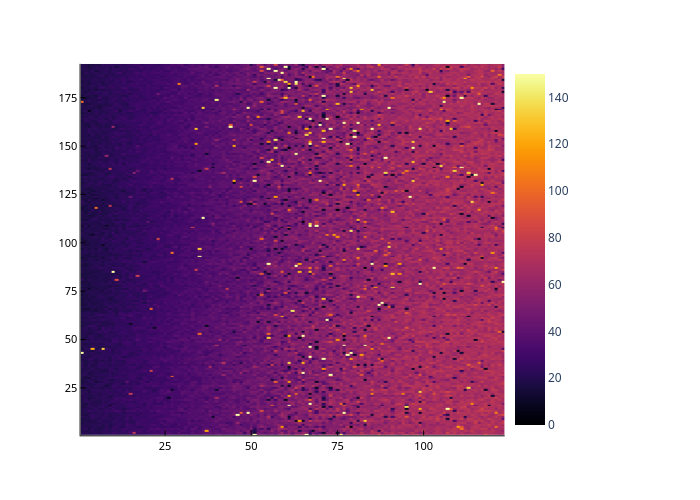

In [38]:
tcspc_var = map(pixel -> var(pixel[1],mean=pixel[2]), zip(tcspc_stream, peaks))
tcspc_std = map(pixel -> std(pixel[1],mean=pixel[2]), zip(tcspc_stream, peaks))
#typeof(peaks)
heatmap(map(peak -> minimum([peak, 150.0]), peaks[:, 5:127]))

### TDC Clock skew
The STOP clock is skewed lineraly across the sensor along the columns axis.

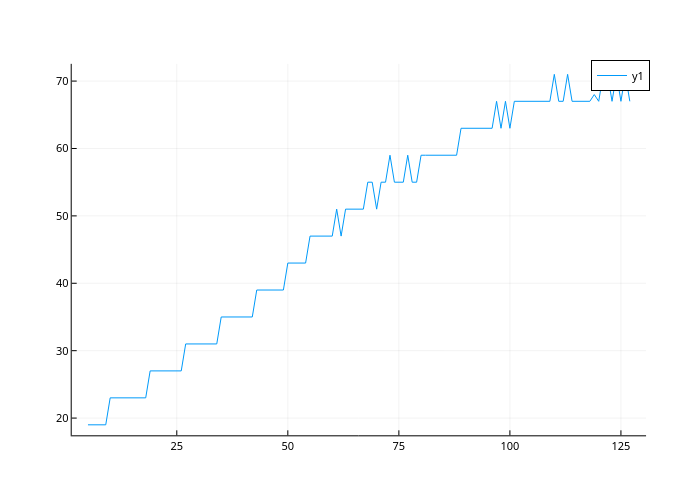

In [ ]:
tcspc_col_stream = [vcat(tcpsc_stream[:, col]...) for col in 1:size(tcspc_stream, 2)]
peaks_col = map(pixel -> get_maximum(pixel), tcspc_col_stream)
typeof(tcspc_col_stream)
plot(5:127, peaks_col[5:127])

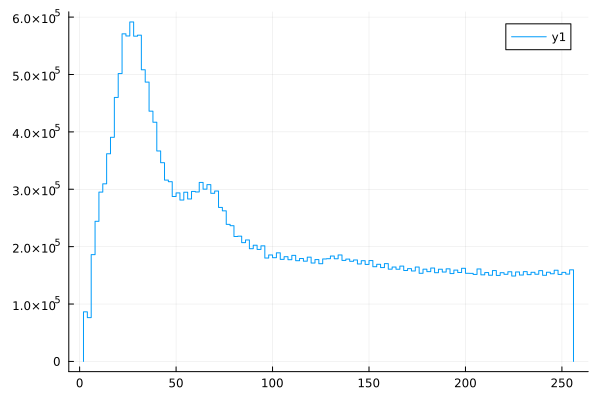

In [11]:
all_pixels = collect(Iterators.filter(x-> x>2.0, skipmissing(Iterators.flatten(tcspc_stream))))
histogram(all_pixels, bins=200)

## Spectral comparisson
Show histogram of one pixel for the 3 different wavelengths

In [39]:
tcspc_stream_blue = tcspc_stream;

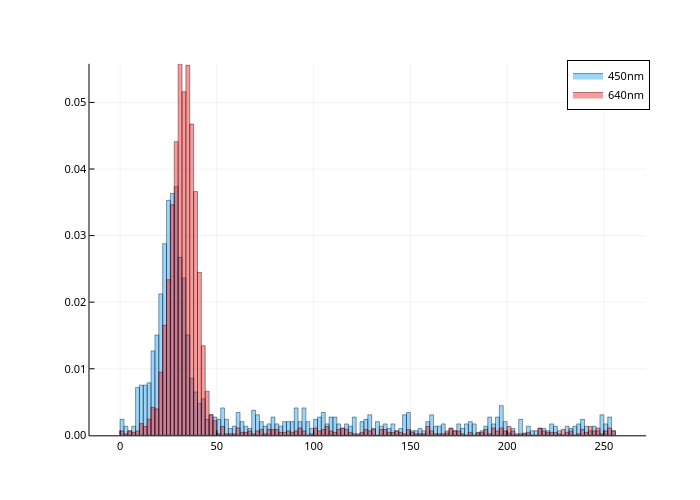

In [41]:
histogram(tcspc_stream_blue[100, 20], bins=200, label="450nm", normalize=:pdf, opacity=0.4)
histogram!(tcspc_stream_red[100, 20], bins=200, label="640nm",normalize=:pdf, color=:red, opacity=0.4)

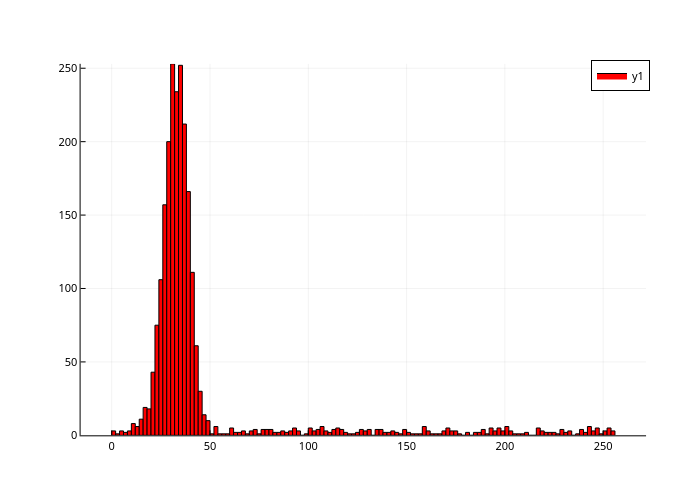

In [255]:
histogram(tcspc_stream_red[100, 20], bins=200, color=:red)

In [86]:
QuantiCam.cleanup(qc)

[ Info: Disconnected from Sensor
[ Info: Cleaning up FPGA connection to OK FrontPanel
[ Info: FPGA desctructed! => Safe exit


## Comments 

### Measurement

In the above approach, power was increase for the laser and recorded, however power percentage is not linear with absolute value, there is no scientific approach to observe the dependency of the SPAD response to signal power. Ways to overcome this:
    -  A sutiable workaround is to keep the laser power constant and use different ND filters which have well descibed transmittances. Hence we can have a reliable relative power dependency description and only the scale will need to be determined.
    - Get a laser pulse fast diode, but it can be quite expensive (£3000+)

### Time domain vs space domain not orthogonal
The peak of the histogram in the time domain seems to shift monotonically with the column number, which can have be cause by either of or alltogether by:
- The multiple reflection cause one side to be much shorter in terms of flight distance than the other + the incidence to the cylindrical lens is not centered
- The STOP clock rising edge is skewed such that it adds extra delay in the column direction and we need to calibrate the offset for each pixel.

### Better Noise rejection

Triggering the laser only once every two pulses, brought the idea of using the non triggered aquisition period to sample for multiple reflections or background noise.
- Keeping the STOP clock at 10MHz could work well for background rejections, however, the detection photon incidence from background is Poission distributed, hence, we can't trully amplify the peak this way, but we might be able to use this cycle as a photon count mode.
- Having to close-by STOP clock edges could give enough time for premature backscattered photons, but offset the balistic ones in the next frame. I.e. 5ns apart trigger edge pulse, could separate; Similarly, the reverse can be true for multiple reflections.

